In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import division
import datetime

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
dfc = pd.read_csv('../data/raw/contributions.csv')

In [5]:
donations = dfc.Amount.apply(lambda x: float(x.replace(',','').replace('$','')))

#### Basic statistics of donation distribution

In [6]:
donations.describe()

count      330.000000
mean       379.393939
std       1654.684792
min          5.000000
25%         20.000000
50%         50.000000
75%        100.000000
max      25000.000000
Name: Amount, dtype: float64

#### Largest donations

In [7]:
donations.sort_values(ascending=False)[:10]

28     25000.0
200     6999.0
0       5000.0
314     5000.0
8       5000.0
9       5000.0
324     5000.0
10      5000.0
271     5000.0
37      5000.0
Name: Amount, dtype: float64

#### Donation distribution

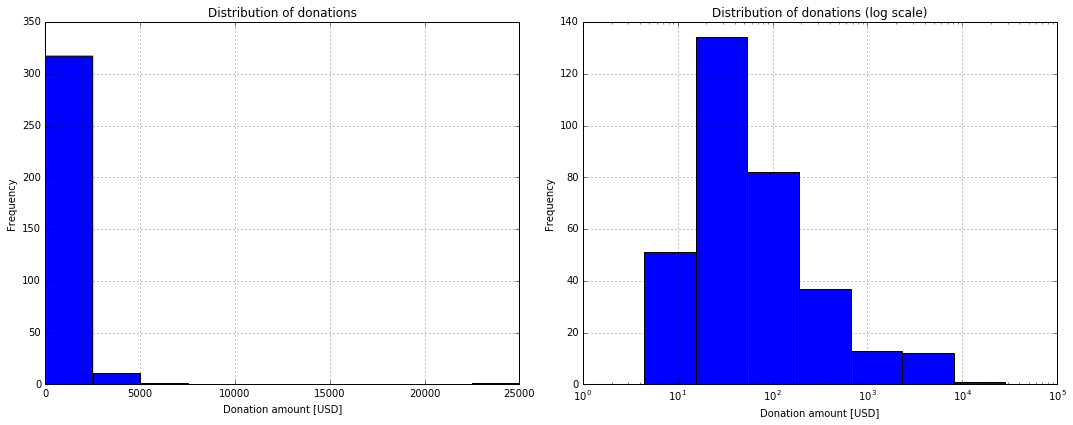

In [8]:
fig = plt.figure(figsize=(15,6))

ax=fig.add_subplot(1, 2, 1)
ax.set_title('Distribution of donations')
ax.set_xlabel('Donation amount [USD]')
ax.set_ylabel('Frequency')
donations.hist(ax=ax);

ax=fig.add_subplot(1, 2, 2)
ax.set_title('Distribution of donations (log scale)')
ax.set_xlabel('Donation amount [USD]')
ax.set_ylabel('Frequency')
ax.set_xscale('log')
donations.hist(bins=np.logspace(0.1, 5, 10), ax=ax);

fig.tight_layout()
plt.show();

#### Cumulative donation distribution

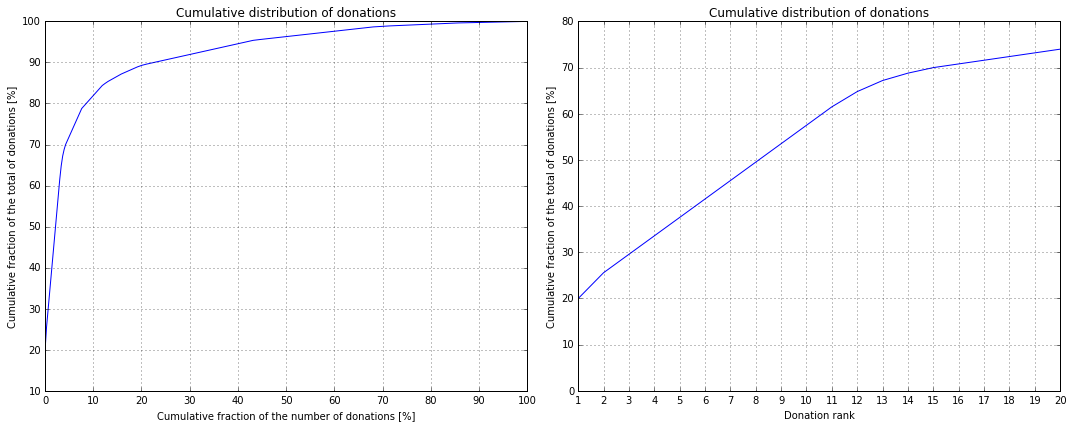

In [9]:
donations_cum = donations.sort_values(ascending=False).cumsum().values

fig = plt.figure(figsize=(15,6))

ax=fig.add_subplot(1, 2, 1)
ax.set_title('Cumulative distribution of donations')
ax.set_xlabel('Cumulative fraction of the number of donations [%]')
ax.set_ylabel('Cumulative fraction of the total of donations [%]')
donations_cum_norm = pd.Series(data=donations_cum/donations_cum.max()*100.0,
                               index=np.linspace(1/len(donations_cum), 100, len(donations_cum)))
donations_cum_norm.plot(ax=ax, grid=True);
ax.set_xticks(range(0,101,10))

ax=fig.add_subplot(1, 2, 2)
ax.set_title('Cumulative distribution of donations')
ax.set_xlabel('Donation rank')
ax.set_ylabel('Cumulative fraction of the total of donations [%]')
donations_cum_norm = pd.Series(data=donations_cum/donations_cum.max()*100.0, index=[1+x for x in range(len(donations_cum))])
donations_cum_norm.plot(ax=ax, grid=True);
ax.set_xlim(1,20)
ax.set_xticks(range(1,21))
ax.set_ylim(0,80)

fig.tight_layout()
plt.show();

In [10]:
print('The largest donation is larger than the sum of the smallest %d donations' %
     pd.Series((100-donations_cum_norm[::-1]).values>donations_cum_norm.iloc[0]).idxmax())
for i in range(1,8):
    print('The sum of the largest %d donations is larger than the sum of the smallest %d donations' %
         (i+1, pd.Series((100-donations_cum_norm[::-1]).values>donations_cum_norm.iloc[i]).idxmax()))

The largest donation is larger than the sum of the smallest 301 donations
The sum of the largest 2 donations is larger than the sum of the smallest 310 donations
The sum of the largest 3 donations is larger than the sum of the smallest 315 donations
The sum of the largest 4 donations is larger than the sum of the smallest 318 donations
The sum of the largest 5 donations is larger than the sum of the smallest 319 donations
The sum of the largest 6 donations is larger than the sum of the smallest 320 donations
The sum of the largest 7 donations is larger than the sum of the smallest 321 donations
The sum of the largest 8 donations is larger than the sum of the smallest 322 donations


#### Fitting empirical donation distribution

In [11]:
import scipy
import scipy.stats

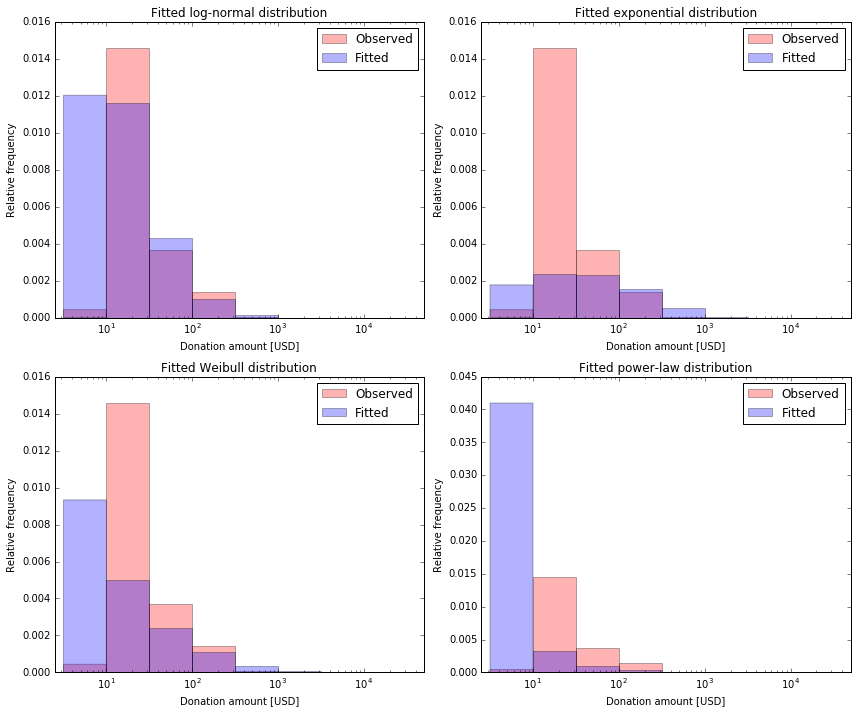

In [12]:
dist_names = [('log-normal', 'lognorm'),
              ('exponential', 'expon'),
              ('Weibull', 'weibull_min'),
              ('power-law', 'powerlaw')]

fig = plt.figure(figsize=(12,10))
for (idx, dist_name) in enumerate(dist_names):
    ax=fig.add_subplot(2, 2, idx+1)
    ax.set_title('Fitted %s distribution' % dist_name[0])
    dist = getattr(scipy.stats, dist_name[1])
    ax.set_xlabel('Donation amount [USD]')
    ax.set_ylabel('Relative frequency')
    
    h_exp = plt.hist(donations, bins=np.logspace(0.5,5,10),
                     color='r', alpha=0.3, label='Observed', normed=True)
    fit_params = dist.fit(donations)
    h_fit = plt.hist(dist.rvs(*fit_params, size=10000), bins=np.logspace(0.5,5,10),
                     color='b', alpha=0.3, label='Fitted', normed=True)
    ax.set_xscale('log')
    ax.legend(loc='upper right')
    ax.set_xlim(2.5, 50000)
    #ax.set_yscale('log')
    #ax.set_ylim(0.001, 0.2)

fig.tight_layout()
plt.show();

The low number of experimental samples makes it difficult to conclude on the goodness of fit of any theoretical distribution